In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!cp "/content/drive/My Drive/Dataset" "Dataset"
!ls

Mounted at /content/drive
 13289075.pdf
 1770_S.gsheet
 1770_S.xls
'2012-10-06 04.11.17.jpg'
'2012-10-12 20.15.47.jpg'
 accounting_basics_tutorial.pdf
'CC statement template konvensional_20190622_0156908913.pdf'
'charging v.7.gsheet'
'Colab Notebooks'
'COVID 19 Readiness.gform'
'COVID 19 Readiness (Responses).gsheet'
 ES20151221205300_7200007935.pdf
 GApps01.gdoc
 ML
'Persamaan+Diferensial+Orde+1 (1).pdf'
 RewardByAchievement.gsheet
 RewardByAchievement.xlsx
'Sample upload (1).txt'
'Sample upload.txt'
 SAP-HR-TCODES.pdf
'SURAT KUASA CRV.gdoc'
'UniPump protocol for PTS controller.pdf'
cp: cannot stat '/content/drive/My Drive/Dataset': No such file or directory
drive  sample_data


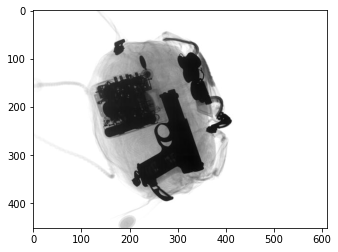

In [ ]:
DATADIR = "/content/drive/My Drive/Dataset"
CATEGORIES = ["Hanguns","Knife","Shuriken"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [ ]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
print(img_array.shape)

(452, 612)


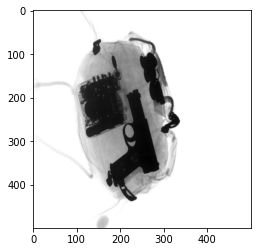

In [ ]:
IMG_SIZE = 500

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
print(len(training_data))

1602


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
1
2
1
0
0
2
0
0
0


In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
X = X/255.0
y = np.array(y)
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y, epochs = 10, validation_split=0.1)

Epoch 1/10
46/46 [==============================] - 531s 12s/step - loss: 0.0000e+00 - accuracy: 0.3505 - val_loss: 0.0000e+00 - val_accuracy: 0.6398
Epoch 2/10
46/46 [==============================] - 532s 12s/step - loss: 0.0000e+00 - accuracy: 0.3838 - val_loss: 0.0000e+00 - val_accuracy: 0.5031
Epoch 3/10
46/46 [==============================] - 516s 11s/step - loss: 0.0000e+00 - accuracy: 0.3643 - val_loss: 0.0000e+00 - val_accuracy: 0.3416
Epoch 4/10
46/46 [==============================] - 516s 11s/step - loss: 0.0000e+00 - accuracy: 0.5108 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 5/10
46/46 [==============================] - 520s 11s/step - loss: 0.0000e+00 - accuracy: 0.4157 - val_loss: 0.0000e+00 - val_accuracy: 0.4534
Epoch 6/10
46/46 [==============================] - 514s 11s/step - loss: 0.0000e+00 - accuracy: 0.5080 - val_loss: 0.0000e+00 - val_accuracy: 0.4783
Epoch 7/10
46/46 [==============================] - 507s 11s/step - loss: 0.0000e+00 - accuracy: 0.4